In [1]:
#basico
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipeadatapy as ip

### Importa Base

In [2]:
df = pd.read_csv('base.csv', sep = ';')
df['DATA_REFERENCIA'] = pd.to_datetime(df['DATA_REFERENCIA'])

In [3]:
variaveis = df.columns.drop('DATA_REFERENCIA')

In [4]:
df[variaveis] = df[variaveis].applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)

In [5]:
df[variaveis] = df[variaveis].astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   DATA_REFERENCIA              108 non-null    datetime64[ns]
 1   PD                           108 non-null    float64       
 2   IBC_BR                       108 non-null    float64       
 3   PRODUCAO_INDUSTRIAL          108 non-null    float64       
 4   SLD_CREDITO_TOTAL_BRASIL_BI  108 non-null    float64       
 5   TAXA_SELIC_MES_VAR_ACUM      108 non-null    float64       
 6   CDI_OVER_MES_VAR_ACUM        108 non-null    float64       
 7   TAXA_CAMBIO                  108 non-null    float64       
 8   IPCA                         108 non-null    float64       
 9   INCC_DI                      108 non-null    float64       
 10  IBOVESPA                     108 non-null    float64       
 11  TAXA_DESEMPREGO              108 non-null    

In [7]:
df.isnull().sum()

DATA_REFERENCIA                0
PD                             0
IBC_BR                         0
PRODUCAO_INDUSTRIAL            0
SLD_CREDITO_TOTAL_BRASIL_BI    0
TAXA_SELIC_MES_VAR_ACUM        0
CDI_OVER_MES_VAR_ACUM          0
TAXA_CAMBIO                    0
IPCA                           0
INCC_DI                        0
IBOVESPA                       0
TAXA_DESEMPREGO                0
COMPROMETIMENTO_RENDA          0
ENDIVIDAMENTO_FAMILIA          0
dtype: int64

In [8]:
df

,DATA_REFERENCIA,PD,IBC_BR,PRODUCAO_INDUSTRIAL,SLD_CREDITO_TOTAL_BRASIL_BI,TAXA_SELIC_MES_VAR_ACUM,CDI_OVER_MES_VAR_ACUM,TAXA_CAMBIO,IPCA,INCC_DI,IBOVESPA,TAXA_DESEMPREGO,COMPROMETIMENTO_RENDA,ENDIVIDAMENTO_FAMILIA
0,2015-01-01,0.047921,138.83,102.66304,3021.47,0.935080,0.929346,2.634228,1.24,0.917510,46907.68,7.242305,24.29,39.67
1,2015-02-01,0.048177,136.63,97.57125,3033.50,0.822414,0.818524,2.816450,1.22,0.308251,51583.09,7.395836,24.52,39.70
2,2015-03-01,0.048583,149.58,109.92777,3070.62,1.039972,1.036124,3.139477,1.32,0.621640,51150.16,7.508735,24.47,39.79
3,2015-04-01,0.048970,142.52,103.51269,3070.71,0.951796,0.948275,3.043220,0.71,0.457051,56229.38,7.600732,24.61,40.08
4,2015-05-01,0.049263,139.92,108.44442,3092.37,0.985332,0.983845,3.061715,0.74,0.953144,52760.48,7.984139,24.51,40.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2023-08-01,0.032080,151.36,111.25394,5553.90,1.137506,1.137506,4.903543,0.23,0.170000,115741.81,7.876280,27.22,48.25
104,2023-09-01,0.032359,144.90,106.28858,5614.67,0.972912,0.972912,4.936990,0.26,0.340000,116565.17,7.844686,27.09,48.14
105,2023-10-01,0.032385,145.00,107.02784,5636.98,0.997572,0.997572,5.065210,0.24,0.200000,113143.67,7.902569,27.03,48.13
106,2023-11-01,0.032850,144.28,102.78393,5702.27,0.915991,0.915991,4.890876,0.28,0.070000,126165.64,7.934131,26.56,48.13


### Selecionando variáveis de interesse

In [9]:
#df_mod = df[['DATA_REFERENCIA','PD','ENDIVIDAMENTO_FAMILIA','COMPROMETIMENTO_RENDA','PRODUCAO_INDUSTRIAL','IBOVESPA']]
df_mod = df[['DATA_REFERENCIA','PD']]

df_mod['PD'] = df_mod['PD'] * 100
df_mod

C:\Users\Douglas\AppData\Local\Temp\ipykernel_2132\2268481703.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['PD'] = df_mod['PD'] * 100


,DATA_REFERENCIA,PD
0,2015-01-01,4.792146
1,2015-02-01,4.817676
2,2015-03-01,4.858344
3,2015-04-01,4.896990
4,2015-05-01,4.926288
...,...,...
103,2023-08-01,3.207965
104,2023-09-01,3.235853
105,2023-10-01,3.238519
106,2023-11-01,3.284994


### Buscando informações no IPEA-DATA

In [10]:
inicio = '2015-01-01'
fim = '2023-12-31'

In [11]:
# Função para buscar séries com base nos códigos e filtrar por período
def buscar_serie(codigo, inicio=None, fim=None):

    # busca todo histórico da série
    df = ip.timeseries(codigo).reset_index()
    
    # Converte a coluna DATE para datetime, se necessário
    df['DATE'] = pd.to_datetime(df['DATE'])
    
    # Filtra pelo período solicitado
    if inicio and fim:
        df = df[(df['DATE'] >= inicio) & (df['DATE'] <= fim)]

    # Selecionar todas as colunas que contêm 'VALUE' no nome
    colunas_value = df.columns[df.columns.str.contains('VALUE', case=False, na=False)]

    # Adicionar a coluna 'DATE' à lista de colunas selecionadas
    colunas_selecionadas = ['DATE'] + colunas_value.tolist()
    
    # Filtrar o DataFrame com as colunas selecionadas
    df = df[colunas_selecionadas]
    
    return df

In [12]:
# Códigos das séries
series_codigos = {
    "IPCA": "PAN12_IPCAG12",
    "DESEMPREGO": "PNADC12_TDESOC12",
    "PIB": "BM12_PIB12", 
    "SELIC": "PAN12_TJOVER12", 
    "CAMBIO": "PAN12_ERV12"
}

In [13]:
# Baixa todas as séries e salva em um dicionário
series_data = {}
for nome, codigo in series_codigos.items():
    print(f"Buscando {nome}...")
    try:
        series_data[nome] = buscar_serie(codigo, inicio, fim)
    except Exception as e:
        print(f"Erro ao buscar a série {nome}: {e}")


Buscando IPCA...
Buscando DESEMPREGO...
Buscando PIB...
Buscando SELIC...
Buscando CAMBIO...


### Verificar se as datas são iguais em todas as séries

In [14]:
# Extrair as colunas DATE de cada série
datas_por_serie = {nome: df['DATE'].unique() for nome, df in series_data.items()}

# Verificar se todas as séries possuem as mesmas datas
datas_iguais = all((datas_por_serie[nome] == datas_por_serie['IPCA']).all() for nome in datas_por_serie)

if datas_iguais:
    print("Todas as séries possuem os mesmos valores na coluna 'DATE'.")
else:
    print("As séries possuem diferenças na coluna 'DATE'.")

Todas as séries possuem os mesmos valores na coluna 'DATE'.


### Combinar todas as séries em um único DataFrame

In [15]:
if datas_iguais:
    # Criar DataFrame base com as datas
    df_combinado = pd.DataFrame({'DATA_REFERENCIA': series_data['IPCA']['DATE']})
    
    # Adicionar os valores de cada série
    for nome, df in series_data.items():
        # Selecionar a coluna de valores que contém 'VALUE'
        coluna_value = [col for col in df.columns if 'VALUE' in col.upper()]
        if len(coluna_value) == 1:  # Garantir que há apenas uma coluna correspondente
            df_combinado[nome] = df[coluna_value[0]].values
        else:
            print(f"Erro: mais de uma coluna ou nenhuma coluna contendo 'VALUE' encontrada na série {nome}")
    
    # Exibir o DataFrame combinado
    print(df_combinado.head())
else:
    print("Não foi possível combinar as séries devido a diferenças nas datas.")


    DATA_REFERENCIA       IPCA  DESEMPREGO       PIB      SELIC    CAMBIO
420      2015-01-01  15.937189         6.9  472913.9  11.881841  2.634229
421      2015-02-01  15.661930         7.5  460156.7  10.296141  2.816450
422      2015-03-01  17.043289         8.0  501752.2  13.219192  3.139477
423      2015-04-01   8.861216         8.1  486614.6  12.014922  3.043220
424      2015-05-01   9.249130         8.3  483239.7  12.548696  3.061715


In [16]:
df_combinado.sort_values('DATA_REFERENCIA')

,DATA_REFERENCIA,IPCA,DESEMPREGO,PIB,SELIC,CAMBIO
420,2015-01-01,15.937189,6.9,472913.9,11.881841,2.634229
421,2015-02-01,15.661930,7.5,460156.7,10.296141,2.816450
422,2015-03-01,17.043289,8.0,501752.2,13.219192,3.139477
423,2015-04-01,8.861216,8.1,486614.6,12.014922,3.043220
424,2015-05-01,9.249130,8.3,483239.7,12.548696,3.061715
...,...,...,...,...,...,...
523,2023-08-01,2.795873,7.8,923374.4,14.571181,4.903500
524,2023-09-01,3.165646,7.7,905912.7,12.281518,4.937000
525,2023-10-01,2.918031,7.6,943578.5,12.682503,5.064800
526,2023-11-01,3.412806,7.5,950303.5,11.616115,4.898300


In [17]:
df_combinado['DATA_REFERENCIA'].min()

Timestamp('2015-01-01 00:00:00')

In [18]:
df_combinado['DATA_REFERENCIA'].max()

Timestamp('2023-12-01 00:00:00')

In [19]:
# unindo bases
df = df_mod.merge(df_combinado, how='left', on= 'DATA_REFERENCIA')

In [20]:
df

,DATA_REFERENCIA,PD,IPCA,DESEMPREGO,PIB,SELIC,CAMBIO
0,2015-01-01,4.792146,15.937189,6.9,472913.9,11.881841,2.634229
1,2015-02-01,4.817676,15.661930,7.5,460156.7,10.296141,2.816450
2,2015-03-01,4.858344,17.043289,8.0,501752.2,13.219192,3.139477
3,2015-04-01,4.896990,8.861216,8.1,486614.6,12.014922,3.043220
4,2015-05-01,4.926288,9.249130,8.3,483239.7,12.548696,3.061715
...,...,...,...,...,...,...,...
103,2023-08-01,3.207965,2.795873,7.8,923374.4,14.571181,4.903500
104,2023-09-01,3.235853,3.165646,7.7,905912.7,12.281518,4.937000
105,2023-10-01,3.238519,2.918031,7.6,943578.5,12.682503,5.064800
106,2023-11-01,3.284994,3.412806,7.5,950303.5,11.616115,4.898300


### Cria variáveis com lags:

In [21]:
lags = ['1','3','6','12']

In [22]:
variaveis = df.drop(columns=['DATA_REFERENCIA','PD']).columns

In [23]:
for var in variaveis:
    nome_coluna =  var
    
    # Defina o número de lags que você deseja criar
    for lag in lags:  # Aqui você pode ajustar para o número de lags que deseja criar
        nome_nova_coluna = f'{nome_coluna}_LAG_{lag}'
        df[nome_nova_coluna] = df[nome_coluna].shift(int(lag))

In [24]:
# aplicando um lag na variávl alvo
#df['PD_LAG_1'] = df['PD'].shift(int(1))

In [25]:
df.dropna(inplace=True)

In [26]:
df.columns

Index(['DATA_REFERENCIA', 'PD', 'IPCA', 'DESEMPREGO', 'PIB', 'SELIC', 'CAMBIO',
       'IPCA_LAG_1', 'IPCA_LAG_3', 'IPCA_LAG_6', 'IPCA_LAG_12',
       'DESEMPREGO_LAG_1', 'DESEMPREGO_LAG_3', 'DESEMPREGO_LAG_6',
       'DESEMPREGO_LAG_12', 'PIB_LAG_1', 'PIB_LAG_3', 'PIB_LAG_6',
       'PIB_LAG_12', 'SELIC_LAG_1', 'SELIC_LAG_3', 'SELIC_LAG_6',
       'SELIC_LAG_12', 'CAMBIO_LAG_1', 'CAMBIO_LAG_3', 'CAMBIO_LAG_6',
       'CAMBIO_LAG_12'],
      dtype='object')

In [27]:
df['DATA_REFERENCIA'].min()

Timestamp('2016-01-01 00:00:00')

In [28]:
df['DATA_REFERENCIA'].max()

Timestamp('2023-12-01 00:00:00')

### Selecionar apenas as colunas com defasagem

In [29]:
# Selecionar todas as colunas que contêm 'LAG' no nome
colunas_lag = df.columns[df.columns.str.contains('LAG', case=False, na=False)]

# Adicionar a coluna 'DATA_REFERENCIA' à lista de colunas selecionadas
#colunas_selecionadas = ['DATA_REFERENCIA'] + colunas_lag.tolist()
colunas_selecionadas = ['DATA_REFERENCIA'] + ['PD'] + colunas_lag.tolist()

# Filtrar o DataFrame com as colunas selecionadas
df = df[colunas_selecionadas]

In [30]:
df.columns

Index(['DATA_REFERENCIA', 'PD', 'IPCA_LAG_1', 'IPCA_LAG_3', 'IPCA_LAG_6',
       'IPCA_LAG_12', 'DESEMPREGO_LAG_1', 'DESEMPREGO_LAG_3',
       'DESEMPREGO_LAG_6', 'DESEMPREGO_LAG_12', 'PIB_LAG_1', 'PIB_LAG_3',
       'PIB_LAG_6', 'PIB_LAG_12', 'SELIC_LAG_1', 'SELIC_LAG_3', 'SELIC_LAG_6',
       'SELIC_LAG_12', 'CAMBIO_LAG_1', 'CAMBIO_LAG_3', 'CAMBIO_LAG_6',
       'CAMBIO_LAG_12'],
      dtype='object')

### Calcular a Correlação

In [31]:
# Calcular a correlação de todas as variáveis com PD_LAG_1
#correlacoes = df.corr()['PD_LAG_1'].drop('PD_LAG_1')  # Remove a autocorrelação
correlacoes = df.corr()['PD'].drop('PD')  # Remove a autocorrelação

# Exibir as correlações
print(correlacoes)

IPCA_LAG_1          -0.068423
IPCA_LAG_3           0.015646
IPCA_LAG_6           0.077725
IPCA_LAG_12          0.251098
DESEMPREGO_LAG_1     0.108680
DESEMPREGO_LAG_3    -0.008018
DESEMPREGO_LAG_6    -0.195590
DESEMPREGO_LAG_12   -0.541495
PIB_LAG_1           -0.657232
PIB_LAG_3           -0.650716
PIB_LAG_6           -0.636575
PIB_LAG_12          -0.647253
SELIC_LAG_1          0.460339
SELIC_LAG_3          0.514022
SELIC_LAG_6          0.595958
SELIC_LAG_12         0.639960
CAMBIO_LAG_1        -0.696865
CAMBIO_LAG_3        -0.653394
CAMBIO_LAG_6        -0.628479
CAMBIO_LAG_12       -0.582533
Name: PD, dtype: float64


C:\Users\Douglas\AppData\Local\Temp\ipykernel_2132\4155602690.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacoes = df.corr()['PD'].drop('PD')  # Remove a autocorrelação


### Mapa de Correlação

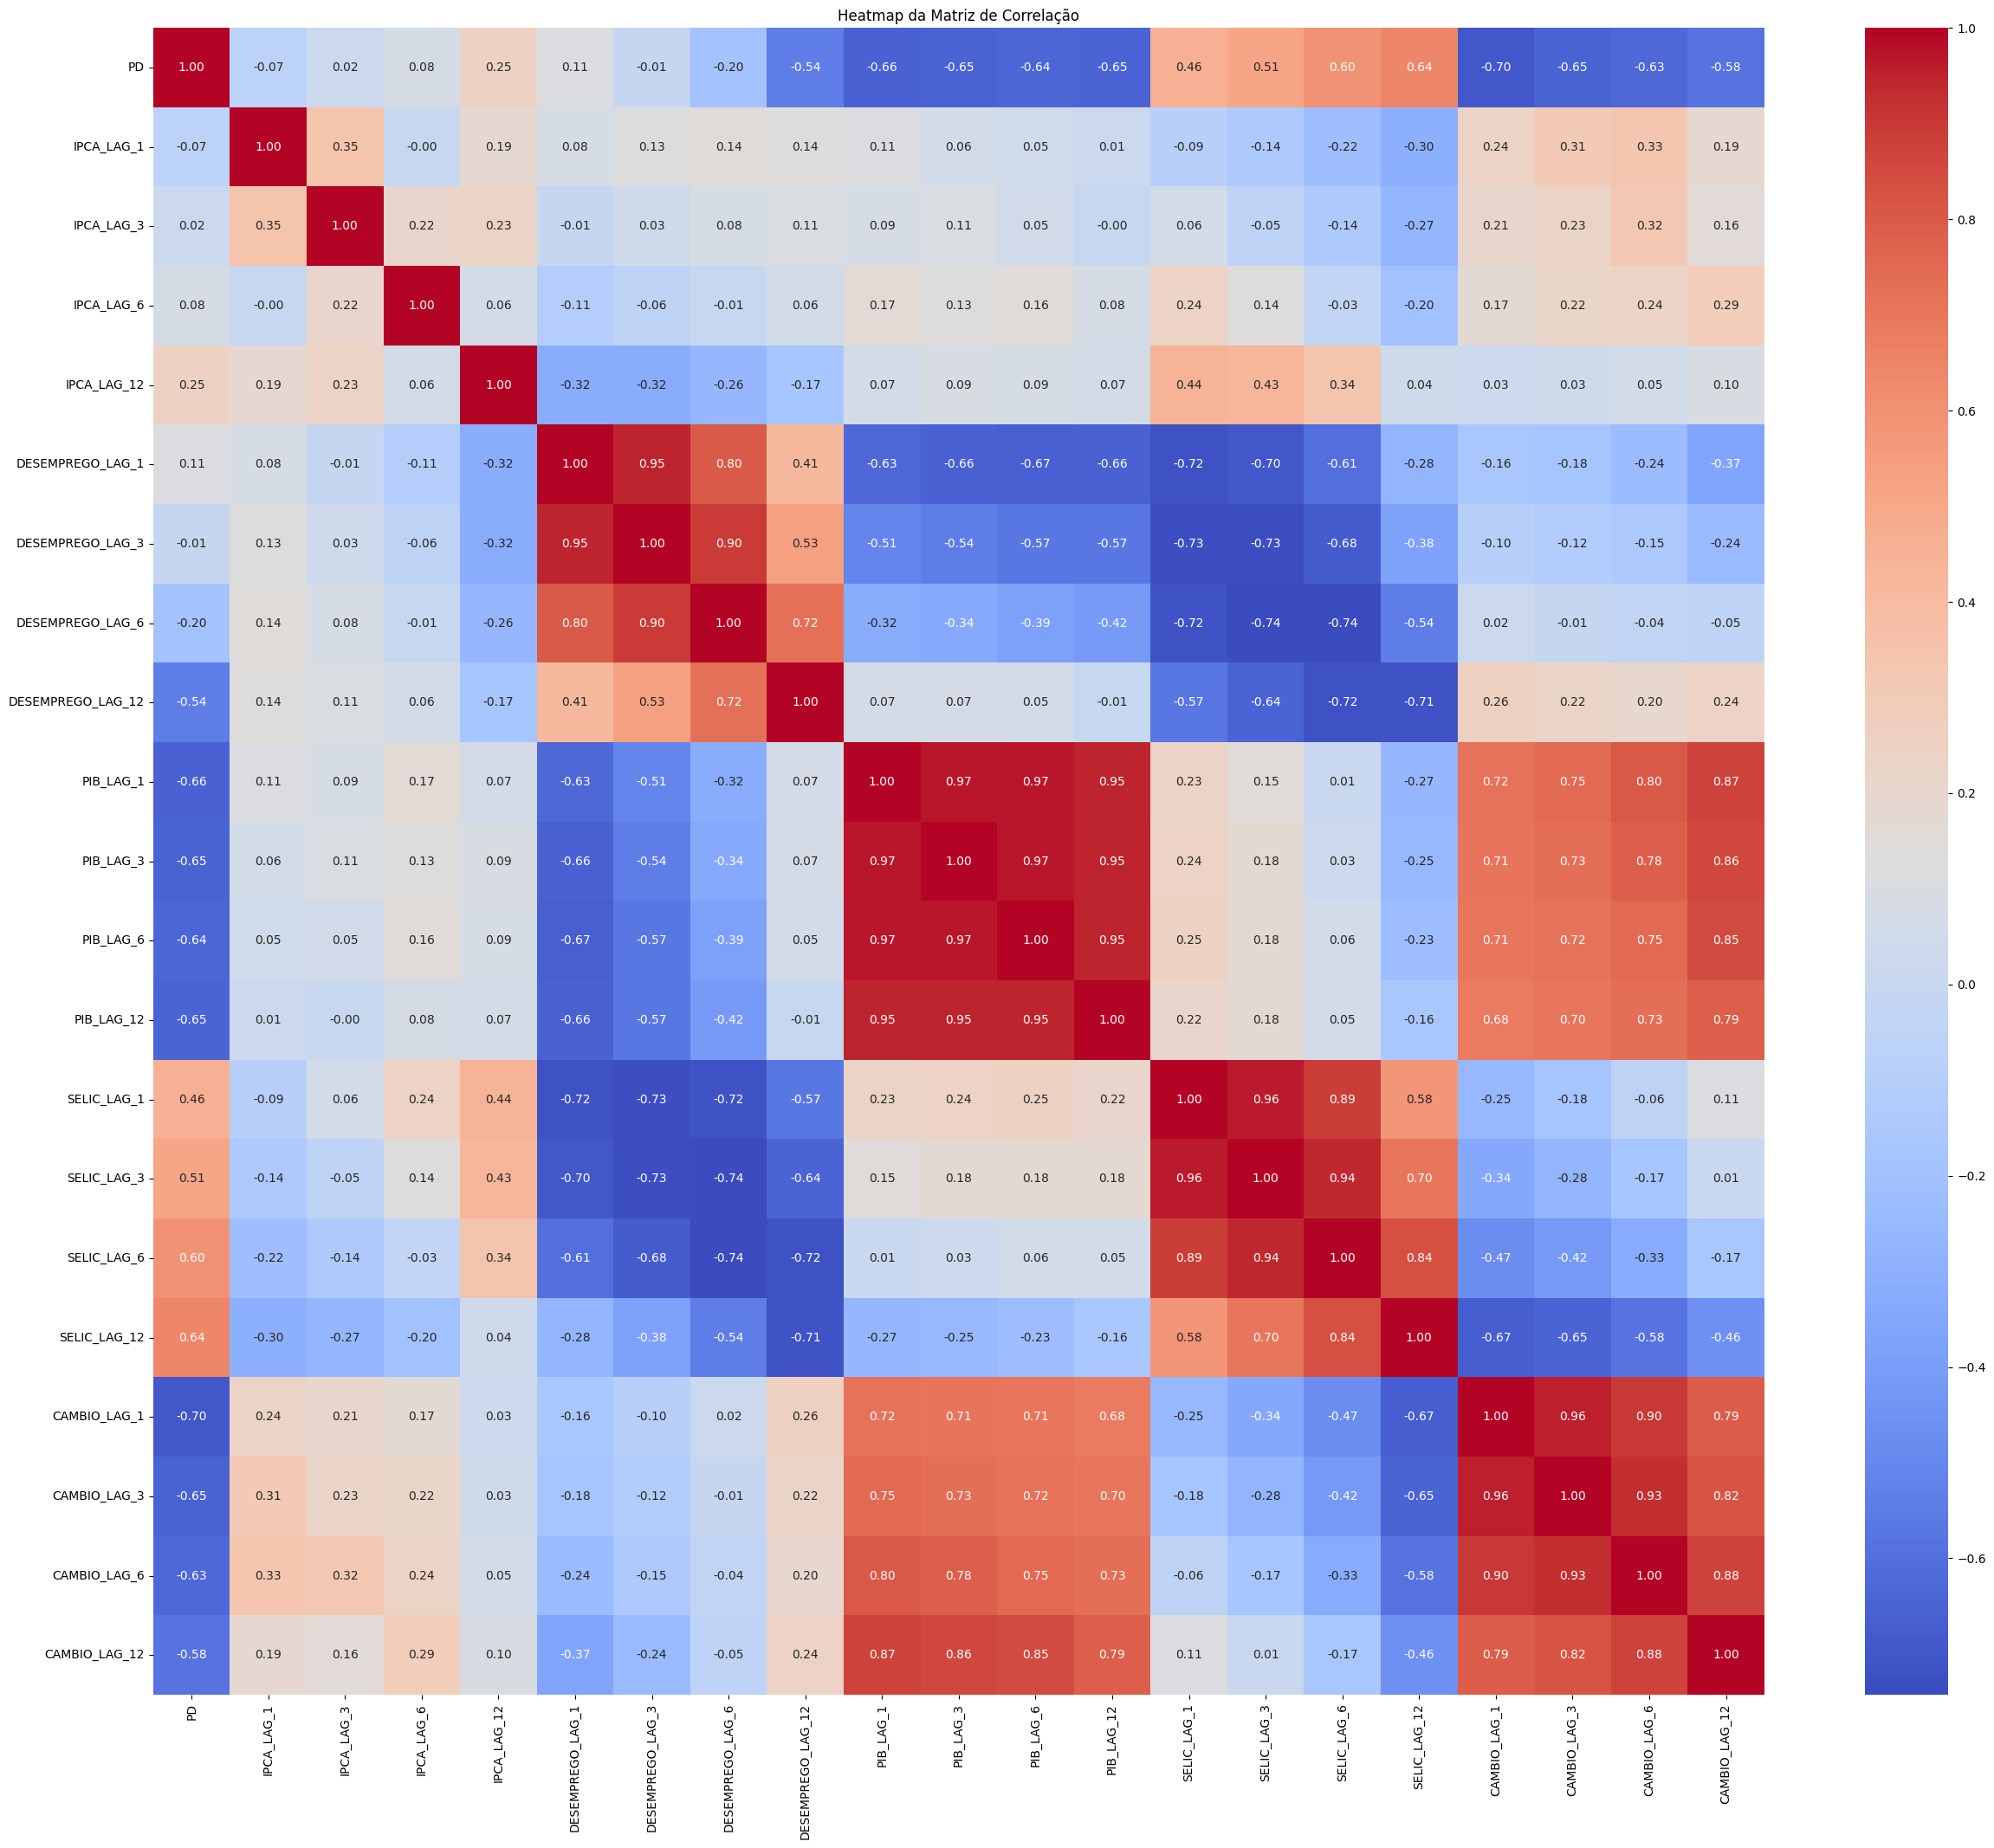

In [32]:
# Criar o heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(df.drop(columns='DATA_REFERENCIA').corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Título e exibição do gráfico
plt.title("Heatmap da Matriz de Correlação")
plt.show()

In [33]:
df.to_parquet('base.parquet')